### INSTALLING YOLO ULTRALYTICS , PyTorch and other Dependancies


In [1]:
!git clone https://github.com/ultralytics/yolov5

In [11]:
!cd yolov5 & pip install -r requirements.txt

In [12]:
!pip3 install torch torchvision torchaudio

In [13]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

## TRAINING THEM BY PASTING THE YAML FILE IN YOLO FOLDER

In [45]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5n.pt

^C


In [ ]:
# Nano YOLO model is used
# Only trained for 16 epochs (interuptted)
# Best score was 74% MaP

### LOADING THE MODEL

In [23]:
model = torch.hub.load("ultralytics/yolov5" , "custom" , path="yolov5/runs/train/exp3/weights/last.pt" , force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\91897/.cache\torch\hub\master.zip
YOLOv5  2023-11-30 Python-3.9.13 torch-2.1.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


### DETECTIONS USING IMAGE

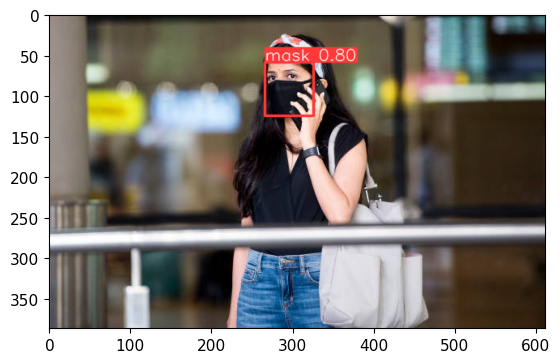

In [39]:
%matplotlib inline
img = "test/image_117.jpg"
results = model(img)
plt.imshow(np.squeeze(results.render()))
plt.show()

### DETECTIONS USING VIDEOS

In [44]:
cap = cv2.VideoCapture("test/video1.mp4")
while cap.isOpened():
    ret , frame = cap.read()
    results = model(frame)
    
    cv2.imshow("YOLO" , np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()